In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

`img = cv2.imread()` returns an image (as an ndarray) with order of colours as `bgr`. To convert to `rgb`, use `img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)` 

In [2]:
img = cv2.imread("IMG-24.jpg")

In [3]:
type(img)

numpy.ndarray

In [4]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

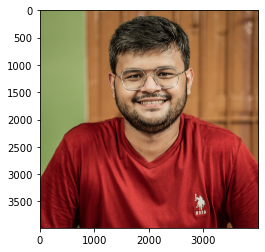

In [5]:
plt.imshow(img)

In [6]:
img.shape

(3985, 4000, 3)

In [7]:
img1 = img.copy()

### Creating the Data for KMeans

In [8]:
img1 = img1.reshape(-1,3)

In [9]:
img1.shape

(15940000, 3)

## K-Means Algorithm

In [10]:
from sklearn.cluster import KMeans

In [11]:
main_colours = 5

kmeans = KMeans(main_colours)
kmeans.fit(img1)

KMeans(n_clusters=5)

In [13]:
kmeans.cluster_centers_

array([[159.82905483, 110.21072406,  66.8212273 ],
       [123.1185721 ,  21.56456459,  22.52157344],
       [ 53.70781649,  19.39476602,  15.44170592],
       [183.03990415,  48.34757141,  48.7030228 ],
       [171.66540189, 163.80876953, 113.96652528]])

In [14]:
centroids = np.array(kmeans.cluster_centers_, dtype="uint8")

In [15]:
centroids

array([[159, 110,  66],
       [123,  21,  22],
       [ 53,  19,  15],
       [183,  48,  48],
       [171, 163, 113]], dtype=uint8)

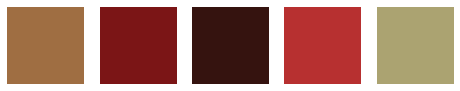

In [19]:
i = 1

plt.figure(0,figsize=(8,2))

# Storing info in color array
colors = []

for each_col in centroids:
    plt.subplot(1,main_colours,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    # Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

In [32]:
labels = kmeans.labels_

In [33]:
colors

[array([159, 110,  66], dtype=uint8),
 array([123,  21,  22], dtype=uint8),
 array([53, 19, 15], dtype=uint8),
 array([183,  48,  48], dtype=uint8),
 array([171, 163, 113], dtype=uint8)]

In [34]:
new_image = np.zeros((img1.shape[0], img1.shape[1]))

In [35]:
new_image.shape

(15940000, 3)

In [36]:
for i in range(new_image.shape[0]):
    new_image[i] = colors[labels[i]]

In [48]:
new_image = new_image.reshape((img.shape))
new_image = np.array(new_image, dtype="uint8")

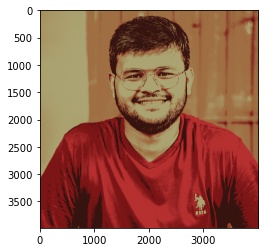

In [49]:
plt.imshow(new_image)
plt.show()

Text(0.5, 1.0, 'Image with KMeans applied, K=5')

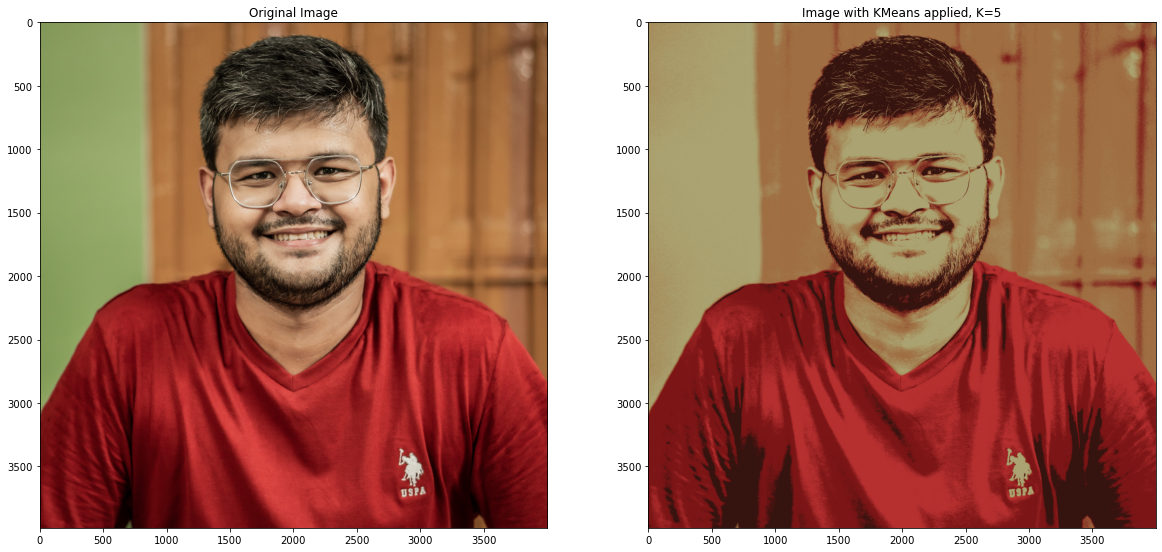

In [51]:
plt.rcParams["figure.figsize"] = (20,10)
ax = plt.subplot(1,2,1)
ax.imshow(img)
ax.set_title("Original Image")

ax = plt.subplot(1,2,2)
ax.imshow(new_image)
ax.set_title("Image with KMeans applied, K=5")

### Consolidating

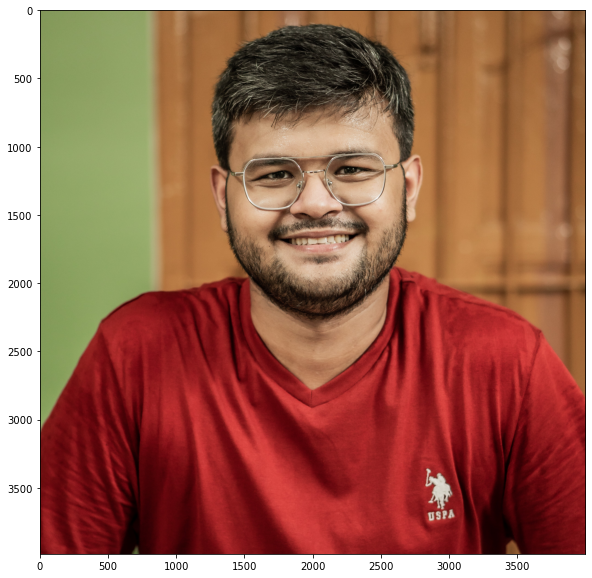

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("IMG-24.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

def convert_image(img, n_colours=4):
    ## import sklearn, if the function is running standalone
    from sklearn.cluster import KMeans
    
    original_image_shape = img.shape
    img1 = img.copy()
    img1 = img1.reshape(-1,3)
    
    kmeans = KMeans(n_colours)
    kmeans.fit(img1)
    
    centroids = np.array(kmeans.cluster_centers_, dtype="uint8")
    labels = kmeans.labels_
    
    i = 1

    plt.figure(0,figsize=(8,2))

    # Storing info in color array
    colors = []
    print(f"The {n_colours} colours found are: ")
    for each_col in centroids:
        plt.subplot(1,n_colours,i)
        plt.axis("off")
        i+=1
    
        colors.append(each_col)
    
        a = np.zeros((100,100,3),dtype='uint8')
        a[:,:,:] = each_col
        plt.imshow(a)
    
    plt.show()
    
    new_image = np.zeros((img1.shape[0], img1.shape[1]))
    for i in range(new_image.shape[0]):
        new_image[i] = colors[labels[i]]
    
    new_image = new_image.reshape(original_image_shape)
    new_image = np.array(new_image, dtype="uint8")
    
    plt.rcParams["figure.figsize"] = (20,10)
    ax = plt.subplot(1,2,1)
    ax.imshow(img)
    ax.set_title("Original Image")

    ax = plt.subplot(1,2,2)
    ax.imshow(new_image)
    ax.set_title(f"Image with KMeans applied, K={n_colours}")

The 4 colours found are: 


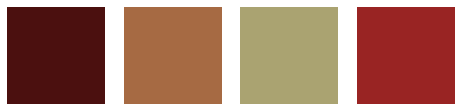

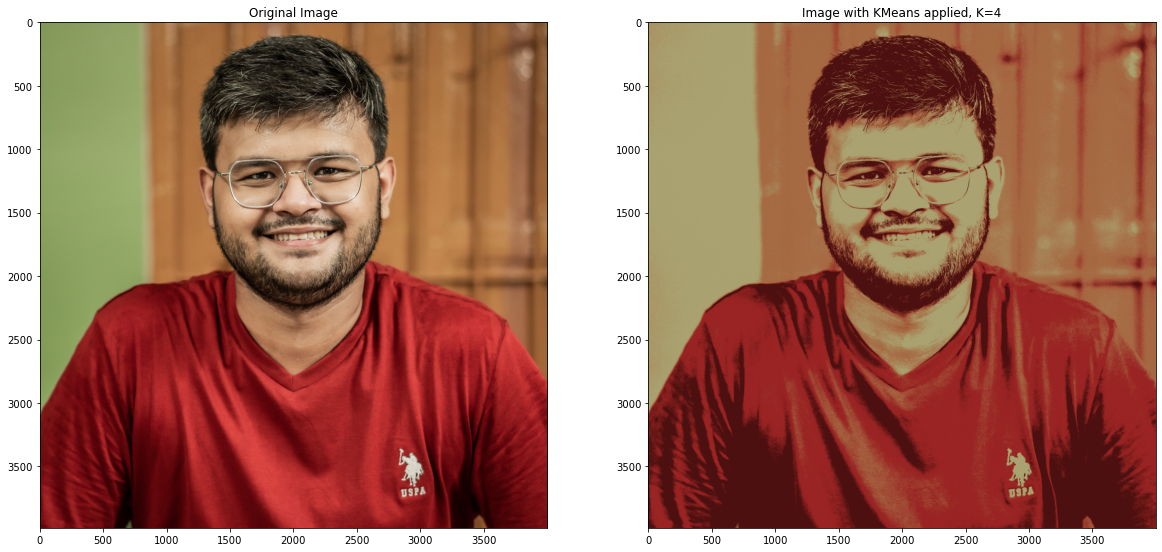

In [63]:
convert_image(img, n_colours=4)

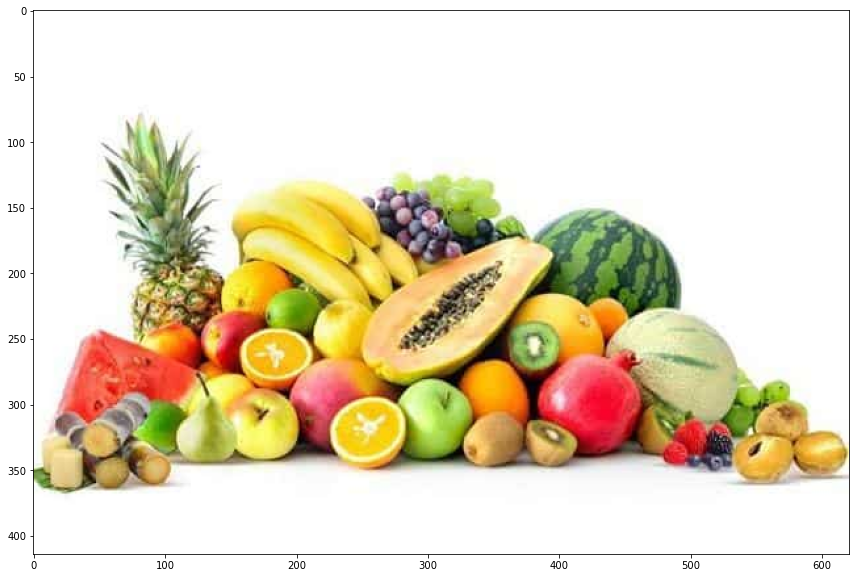

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("fruits.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

The 4 colours found are: 


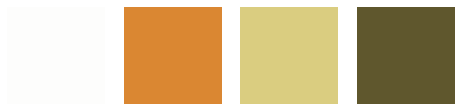

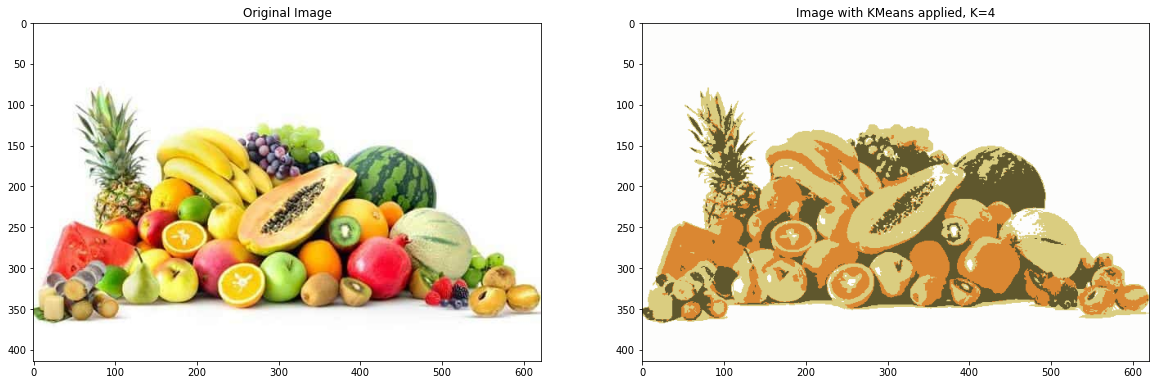

In [65]:
convert_image(img, n_colours=4)

The 6 colours found are: 


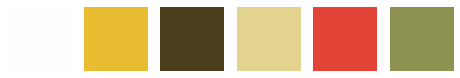

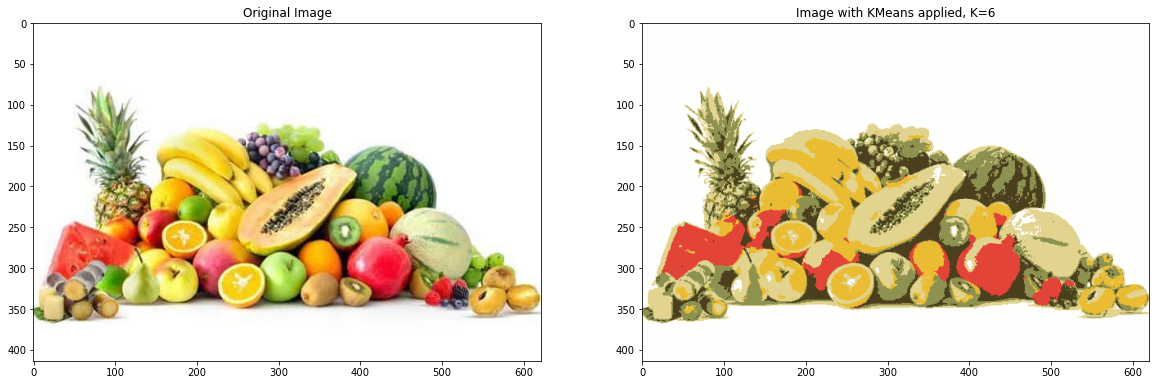

In [66]:
convert_image(img, n_colours=6)

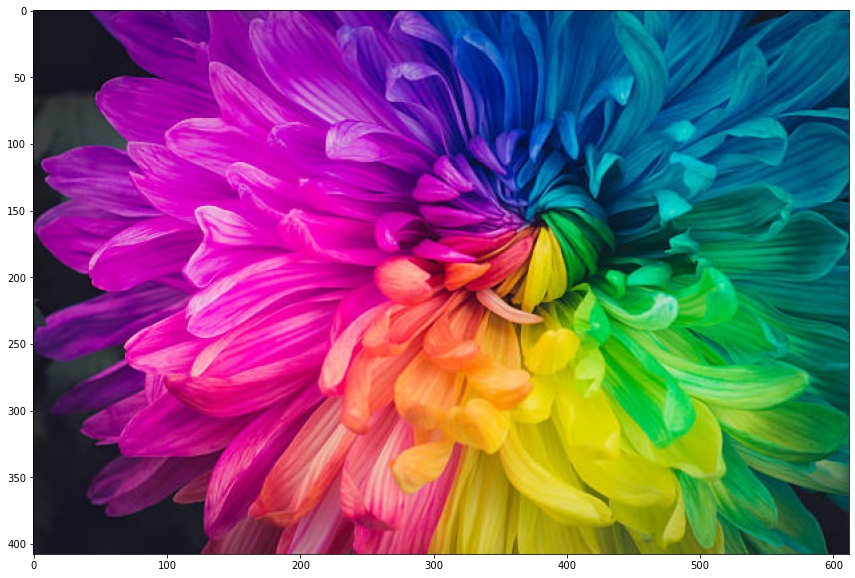

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("flower.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

The 4 colours found are: 


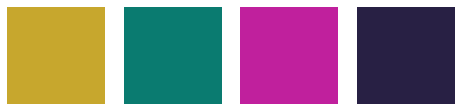

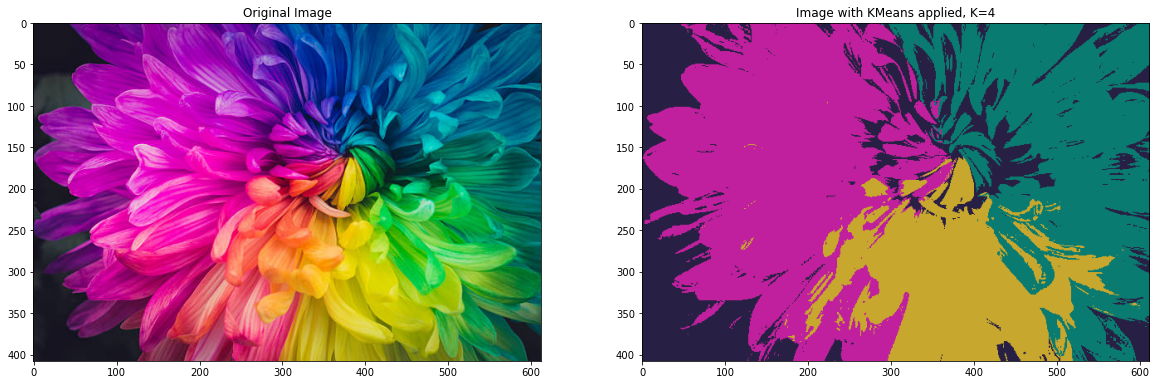

In [80]:
convert_image(img, n_colours=4)

The 10 colours found are: 


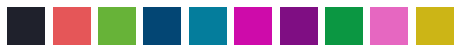

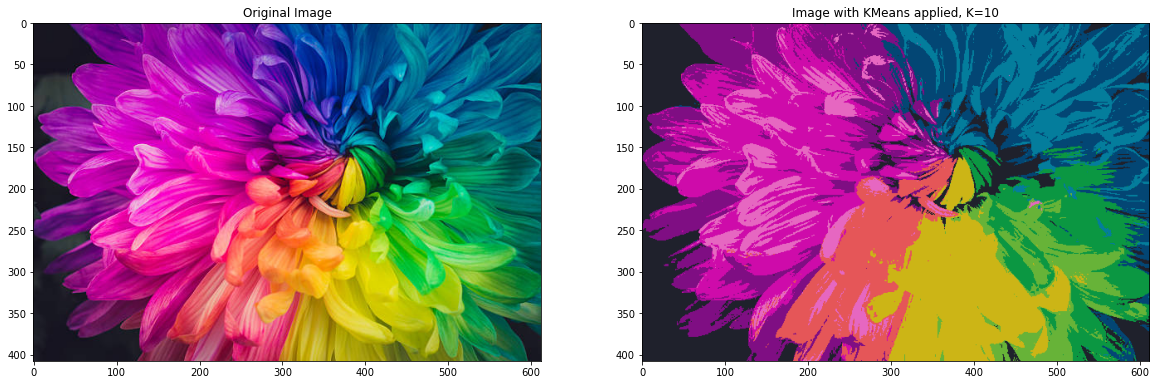

In [82]:
convert_image(img, n_colours=10)